# 주식 예측
GOOG 주식 2018.03.19 - 2020.04.17 데이터 사용

In [1]:
import numpy as np
import pandas as pd

# tensorflow
import tensorflow as tf

# keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation

# 시각화
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = pd.read_csv("C:/Users/student/Desktop/TIL/머신러닝&딥러닝/Datasest/GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-19,1120.010010,1121.989990,1089.010010,1099.819946,1099.819946,2805900
1,2018-03-20,1099.000000,1105.199951,1083.459961,1097.709961,1097.709961,1831900
2,2018-03-21,1092.739990,1106.300049,1085.150024,1090.880005,1090.880005,1878900
3,2018-03-22,1081.880005,1082.900024,1045.910034,1049.079956,1049.079956,2667000
4,2018-03-23,1047.030029,1063.359985,1021.219971,1021.570007,1021.570007,2156700


In [3]:
data.drop(["Adj Close"],axis=1,inplace=True)
data.set_index('Date',drop=True, inplace=True)
data = data[["Open","High","Low","Volume","Close"]]
data.head()

,Open,High,Low,Volume,Close
Date,,,,,
2018-03-19,1120.010010,1121.989990,1089.010010,2805900,1099.819946
2018-03-20,1099.000000,1105.199951,1083.459961,1831900,1097.709961
2018-03-21,1092.739990,1106.300049,1085.150024,1878900,1090.880005
2018-03-22,1081.880005,1082.900024,1045.910034,2667000,1049.079956
2018-03-23,1047.030029,1063.359985,1021.219971,2156700,1021.570007


In [4]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])
data.head()

,Open,High,Low,Volume,Close
Date,,,,,
2018-03-19,-0.516970,-0.610869,-0.678222,1.517908,1099.819946
2018-03-20,-0.700895,-0.758887,-0.726251,0.234409,1097.709961
2018-03-21,-0.755696,-0.749188,-0.711626,0.296344,1090.880005
2018-03-22,-0.850766,-0.955478,-1.051201,1.334871,1049.079956
2018-03-23,-1.155848,-1.127739,-1.264864,0.662418,1021.570007


In [6]:
train = data[:"2020-03-16"]
test = data["2020-03-17":]

train.shape, test.shape

((502, 5), (22, 5))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:-1], train.iloc[:,-1:], test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((351, 4), (151, 4), (351, 1), (151, 1))

## keras로 예측하기

In [8]:
model = Sequential()
model.add(Dense(units=1024, input_dim=4, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)

seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)
hist = model.fit(X_train, y_train, epochs=1000, batch_size=16, callbacks=[es])


Epoch 1/1000
351/351 [==============================] - 0s 1ms/step - loss: 1336791.3155 - mae: 1150.5873
Epoch 2/1000
304/351 [========================>.....] - ETA: 0s - loss: 400283.6842 - mae: 544.49

C:\Users\student\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


351/351 [==============================] - 0s 573us/step - loss: 368725.5954 - mae: 518.1624
Epoch 3/1000
351/351 [==============================] - 0s 615us/step - loss: 111528.6054 - mae: 264.3729
Epoch 4/1000
351/351 [==============================] - 0s 712us/step - loss: 41855.6879 - mae: 158.7939
Epoch 5/1000
351/351 [==============================] - 0s 624us/step - loss: 23840.2826 - mae: 115.6098
Epoch 6/1000
351/351 [==============================] - 0s 672us/step - loss: 14706.1701 - mae: 92.1521
Epoch 7/1000
351/351 [==============================] - 0s 698us/step - loss: 8274.0421 - mae: 65.6589
Epoch 8/1000
351/351 [==============================] - 0s 678us/step - loss: 5624.6022 - mae: 52.9721
Epoch 9/1000
351/351 [==============================] - 0s 661us/step - loss: 3640.5530 - mae: 41.9661
Epoch 10/1000
351/351 [==============================] - 0s 678us/step - loss: 3286.9343 - mae: 41.6523
Epoch 11/1000
351/351 [==============================] - 0s 658us/step - l

351/351 [==============================] - 0s 652us/step - loss: 69.4057 - mae: 6.0959
Epoch 83/1000
351/351 [==============================] - 0s 658us/step - loss: 69.1071 - mae: 5.9834
Epoch 84/1000
351/351 [==============================] - 0s 689us/step - loss: 69.7481 - mae: 6.0830
Epoch 85/1000
351/351 [==============================] - 0s 675us/step - loss: 113.1095 - mae: 8.3579
Epoch 86/1000
351/351 [==============================] - 0s 678us/step - loss: 202.6274 - mae: 11.8294
Epoch 87/1000
351/351 [==============================] - 0s 621us/step - loss: 75.8555 - mae: 6.5278
Epoch 88/1000
351/351 [==============================] - 0s 570us/step - loss: 60.3671 - mae: 5.7378
Epoch 89/1000
351/351 [==============================] - 0s 615us/step - loss: 74.6404 - mae: 6.4099
Epoch 90/1000
351/351 [==============================] - 0s 661us/step - loss: 102.7124 - mae: 7.5423
Epoch 91/1000
351/351 [==============================] - 0s 564us/step - loss: 132.9997 - mae: 9.0077

351/351 [==============================] - 0s 698us/step - loss: 184.3785 - mae: 9.9371
Epoch 162/1000
351/351 [==============================] - 0s 630us/step - loss: 152.4280 - mae: 9.9363
Epoch 163/1000
351/351 [==============================] - 0s 570us/step - loss: 79.9991 - mae: 6.9376
Epoch 164/1000
351/351 [==============================] - 0s 593us/step - loss: 143.5113 - mae: 9.2255
Epoch 165/1000
351/351 [==============================] - 0s 578us/step - loss: 206.8504 - mae: 11.4003
Epoch 166/1000
351/351 [==============================] - 0s 593us/step - loss: 231.9110 - mae: 11.9297
Epoch 167/1000
351/351 [==============================] - 0s 655us/step - loss: 179.9792 - mae: 10.1056
Epoch 168/1000
351/351 [==============================] - 0s 689us/step - loss: 189.3314 - mae: 10.6020
Epoch 169/1000
351/351 [==============================] - 0s 692us/step - loss: 142.0483 - mae: 8.8655
Epoch 170/1000
351/351 [==============================] - 0s 738us/step - loss: 228.3

351/351 [==============================] - 0s 661us/step - loss: 123.6040 - mae: 8.7065
Epoch 241/1000
351/351 [==============================] - ETA: 0s - loss: 123.2871 - mae: 8.785 - 0s 692us/step - loss: 120.3266 - mae: 8.6223
Epoch 242/1000
351/351 [==============================] - 0s 764us/step - loss: 166.0642 - mae: 10.0988
Epoch 243/1000
351/351 [==============================] - 0s 977us/step - loss: 257.3689 - mae: 13.2834
Epoch 244/1000
351/351 [==============================] - 0s 721us/step - loss: 166.1289 - mae: 10.2605
Epoch 245/1000
351/351 [==============================] - 0s 647us/step - loss: 80.2766 - mae: 6.6480
Epoch 246/1000
351/351 [==============================] - 0s 578us/step - loss: 251.9418 - mae: 12.9478
Epoch 247/1000
351/351 [==============================] - 0s 570us/step - loss: 148.3036 - mae: 9.1203
Epoch 248/1000
351/351 [==============================] - 0s 590us/step - loss: 96.7267 - mae: 7.5902
Epoch 249/1000
351/351 [======================

351/351 [==============================] - 0s 764us/step - loss: 119.8671 - mae: 8.4253
Epoch 319/1000
351/351 [==============================] - 0s 615us/step - loss: 202.0862 - mae: 10.9090
Epoch 320/1000
351/351 [==============================] - 0s 615us/step - loss: 254.8225 - mae: 11.9594
Epoch 321/1000
351/351 [==============================] - 0s 613us/step - loss: 106.8830 - mae: 8.0300
Epoch 322/1000
351/351 [==============================] - 0s 587us/step - loss: 153.5750 - mae: 9.9664
Epoch 323/1000
351/351 [==============================] - 0s 650us/step - loss: 431.3550 - mae: 16.8677
Epoch 324/1000
351/351 [==============================] - 0s 672us/step - loss: 230.1128 - mae: 11.7175
Epoch 325/1000
351/351 [==============================] - 0s 675us/step - loss: 193.6487 - mae: 11.4230
Epoch 326/1000
351/351 [==============================] - 0s 900us/step - loss: 108.2498 - mae: 7.9631
Epoch 327/1000
351/351 [==============================] - 0s 764us/step - loss: 89.

351/351 [==============================] - 0s 883us/step - loss: 88.4163 - mae: 7.4029
Epoch 397/1000
351/351 [==============================] - 0s 701us/step - loss: 229.0068 - mae: 11.6847
Epoch 398/1000
351/351 [==============================] - 0s 727us/step - loss: 427.7917 - mae: 17.1598
Epoch 399/1000
351/351 [==============================] - 0s 741us/step - loss: 317.3642 - mae: 13.8652
Epoch 400/1000
351/351 [==============================] - 0s 573us/step - loss: 433.6046 - mae: 16.5240
Epoch 401/1000
351/351 [==============================] - 0s 578us/step - loss: 142.6020 - mae: 9.1536
Epoch 402/1000
351/351 [==============================] - 0s 576us/step - loss: 126.6316 - mae: 8.7298
Epoch 403/1000
351/351 [==============================] - 0s 590us/step - loss: 83.2609 - mae: 6.8398
Epoch 404/1000
351/351 [==============================] - 0s 650us/step - loss: 110.3261 - mae: 8.0969
Epoch 405/1000
351/351 [==============================] - 0s 672us/step - loss: 184.60

351/351 [==============================] - 0s 593us/step - loss: 85.8514 - mae: 6.5788
Epoch 476/1000
351/351 [==============================] - 0s 567us/step - loss: 275.2581 - mae: 12.4658
Epoch 477/1000
351/351 [==============================] - 0s 598us/step - loss: 406.6661 - mae: 15.7015
Epoch 478/1000
351/351 [==============================] - 0s 672us/step - loss: 431.2814 - mae: 17.1474
Epoch 479/1000
351/351 [==============================] - 0s 684us/step - loss: 134.8883 - mae: 9.0197
Epoch 480/1000
351/351 [==============================] - 0s 721us/step - loss: 144.2832 - mae: 9.1491
Epoch 481/1000
351/351 [==============================] - 0s 1ms/step - loss: 164.9621 - mae: 10.2351
Epoch 482/1000
351/351 [==============================] - 0s 618us/step - loss: 119.4704 - mae: 8.5078
Epoch 483/1000
351/351 [==============================] - 0s 573us/step - loss: 114.3846 - mae: 8.2148
Epoch 484/1000
351/351 [==============================] - 0s 570us/step - loss: 82.8391

351/351 [==============================] - 0s 652us/step - loss: 137.4147 - mae: 9.1191
Epoch 555/1000
351/351 [==============================] - 0s 661us/step - loss: 126.0813 - mae: 8.7501
Epoch 556/1000
351/351 [==============================] - 0s 758us/step - loss: 118.5083 - mae: 7.9130
Epoch 557/1000
351/351 [==============================] - 0s 755us/step - loss: 96.0102 - mae: 7.4157
Epoch 558/1000
351/351 [==============================] - 0s 718us/step - loss: 71.5117 - mae: 6.55420s - loss: 59.1784 - mae: 5.
Epoch 559/1000
351/351 [==============================] - 0s 835us/step - loss: 120.8915 - mae: 8.3813
Epoch 560/1000
351/351 [==============================] - 0s 624us/step - loss: 100.3417 - mae: 7.5612
Epoch 561/1000
351/351 [==============================] - 0s 712us/step - loss: 62.1264 - mae: 6.0033
Epoch 562/1000
351/351 [==============================] - 0s 581us/step - loss: 97.4966 - mae: 7.4544
Epoch 563/1000
351/351 [==============================] - 0s 584

351/351 [==============================] - 0s 721us/step - loss: 164.5832 - mae: 10.0918
Epoch 633/1000
351/351 [==============================] - 0s 712us/step - loss: 172.7356 - mae: 10.4798
Epoch 634/1000
351/351 [==============================] - 0s 906us/step - loss: 98.5629 - mae: 7.8488
Epoch 635/1000
351/351 [==============================] - 0s 667us/step - loss: 86.3280 - mae: 7.4433
Epoch 636/1000
351/351 [==============================] - 0s 704us/step - loss: 133.9107 - mae: 9.4727
Epoch 637/1000
351/351 [==============================] - 0s 556us/step - loss: 81.5072 - mae: 6.9668
Epoch 638/1000
351/351 [==============================] - 0s 547us/step - loss: 84.0946 - mae: 6.9667
Epoch 639/1000
351/351 [==============================] - 0s 573us/step - loss: 119.6457 - mae: 8.7408
Epoch 640/1000
351/351 [==============================] - 0s 752us/step - loss: 105.8607 - mae: 8.2421
Epoch 641/1000
351/351 [==============================] - 0s 721us/step - loss: 211.8974 -

351/351 [==============================] - 0s 635us/step - loss: 74.6003 - mae: 6.6863
Epoch 712/1000
351/351 [==============================] - 0s 630us/step - loss: 133.5713 - mae: 9.0957
Epoch 713/1000
351/351 [==============================] - 0s 630us/step - loss: 135.0336 - mae: 9.2593
Epoch 714/1000
351/351 [==============================] - 0s 553us/step - loss: 94.2993 - mae: 7.6662
Epoch 715/1000
351/351 [==============================] - 0s 558us/step - loss: 227.4242 - mae: 12.3481
Epoch 716/1000
351/351 [==============================] - 0s 547us/step - loss: 398.3154 - mae: 16.6776
Epoch 717/1000
351/351 [==============================] - 0s 547us/step - loss: 149.1620 - mae: 10.0581
Epoch 718/1000
351/351 [==============================] - 0s 576us/step - loss: 248.7728 - mae: 12.9512
Epoch 719/1000
351/351 [==============================] - 0s 752us/step - loss: 1794.1625 - mae: 33.6916
Epoch 720/1000
351/351 [==============================] - 0s 601us/step - loss: 682.

Epoch 790/1000
351/351 [==============================] - 0s 553us/step - loss: 113.4223 - mae: 8.0798
Epoch 791/1000
351/351 [==============================] - 0s 578us/step - loss: 117.7679 - mae: 8.6099
Epoch 792/1000
351/351 [==============================] - 0s 721us/step - loss: 122.7075 - mae: 8.6631
Epoch 793/1000
351/351 [==============================] - 0s 707us/step - loss: 128.6252 - mae: 8.9222
Epoch 794/1000
351/351 [==============================] - 0s 650us/step - loss: 107.0661 - mae: 7.9879
Epoch 795/1000
351/351 [==============================] - 0s 652us/step - loss: 77.6201 - mae: 6.8946
Epoch 796/1000
351/351 [==============================] - 0s 678us/step - loss: 131.9831 - mae: 9.5962
Epoch 797/1000
351/351 [==============================] - 0s 638us/step - loss: 67.1788 - mae: 6.2718
Epoch 798/1000
351/351 [==============================] - 0s 635us/step - loss: 123.2311 - mae: 8.7223
Epoch 799/1000
351/351 [==============================] - 0s 652us/step - l

351/351 [==============================] - 0s 601us/step - loss: 178.1629 - mae: 10.6260
Epoch 870/1000
351/351 [==============================] - 0s 618us/step - loss: 111.4556 - mae: 8.2184
Epoch 871/1000
351/351 [==============================] - 0s 618us/step - loss: 156.2936 - mae: 9.7465
Epoch 872/1000
351/351 [==============================] - 0s 610us/step - loss: 119.7466 - mae: 8.4817
Epoch 873/1000
351/351 [==============================] - 0s 678us/step - loss: 177.1763 - mae: 10.4316 0s - loss: 160.5867 - mae: 9.6
Epoch 874/1000
351/351 [==============================] - 0s 647us/step - loss: 131.8581 - mae: 8.7771
Epoch 875/1000
351/351 [==============================] - 0s 601us/step - loss: 282.8383 - mae: 13.9087
Epoch 876/1000
351/351 [==============================] - 0s 598us/step - loss: 241.5476 - mae: 12.0702
Epoch 877/1000
351/351 [==============================] - 0s 598us/step - loss: 143.8372 - mae: 9.6680
Epoch 878/1000
351/351 [=============================

351/351 [==============================] - 0s 601us/step - loss: 96.6693 - mae: 7.4483
Epoch 949/1000
351/351 [==============================] - 0s 729us/step - loss: 102.3454 - mae: 7.8992
Epoch 950/1000
351/351 [==============================] - 0s 638us/step - loss: 165.1667 - mae: 9.7794
Epoch 951/1000
351/351 [==============================] - 0s 635us/step - loss: 172.9317 - mae: 9.9650
Epoch 952/1000
351/351 [==============================] - 0s 635us/step - loss: 345.6112 - mae: 14.7631
Epoch 953/1000
351/351 [==============================] - 0s 729us/step - loss: 178.7317 - mae: 10.3535
Epoch 954/1000
351/351 [==============================] - 0s 709us/step - loss: 83.8617 - mae: 7.0151
Epoch 955/1000
351/351 [==============================] - 0s 578us/step - loss: 82.8164 - mae: 7.0179
Epoch 956/1000
351/351 [==============================] - 0s 556us/step - loss: 66.0600 - mae: 6.1723
Epoch 957/1000
351/351 [==============================] - 0s 561us/step - loss: 173.3318 -

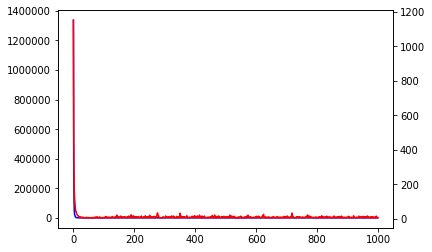

In [10]:
fig, loss_ax = plt.subplots()
mae_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'b',label='train loss')
mae_ax.plot(hist.history['mae'],'r',label='train mae')

In [11]:
loss,mae = model.evaluate(X_test,y_test)
print("loss: ",loss)
print("mae: ",mae)

151/151 [==============================] - 0s 245us/step
loss:  134.97093968675625
mae:  8.443178176879883


In [12]:
k_predicted = model.predict(test.iloc[:,:-1])

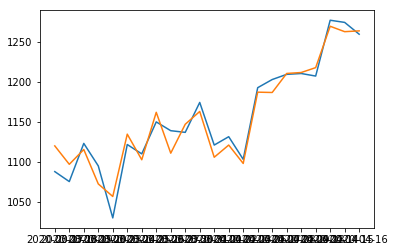

In [13]:
plt.figure()
plt.plot(k_predicted)
plt.plot(test.Close)

## tensorflow로 예측하기

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((351, 4), (151, 4), (351, 1), (151, 1))

In [15]:
w = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

x = tf.placeholder(tf.float32, shape=[None, 4])
y = tf.placeholder(tf.float32, shape=[None, 1])

hf = tf.matmul(x,w) + b
cost = tf.reduce_mean(tf.square(hf-y))

train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [16]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1,20001):
        cv,_ = sess.run([cost,train], feed_dict={x:X_train,y:y_train})
        if step%2000==0:
            print(step,"번째 ",cv)
    
    hv, wv, bv = sess.run([hf,w,b],feed_dict = {x:X_test,y:y_test})
    print("Evaluate : {}".format(np.average((hv - y_test.values)**2)))

2000 번째  54.87851
4000 번째  51.23178
6000 번째  50.969524
8000 번째  50.947105
10000 번째  50.94501
12000 번째  50.94485
14000 번째  50.944775
16000 번째  50.94475
18000 번째  50.94475
20000 번째  50.94475
Evaluate : 72.43376551246456


In [17]:
tf_predicted = np.dot(test.iloc[:,:-1].values, wv )+ bv

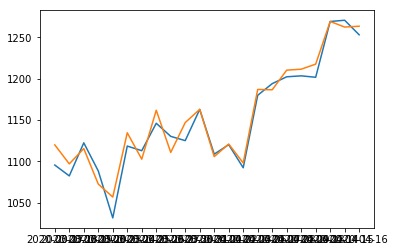

In [18]:
plt.figure()
plt.plot(tf_predicted)
plt.plot(test.Close)

## keras, tensorflow 비교

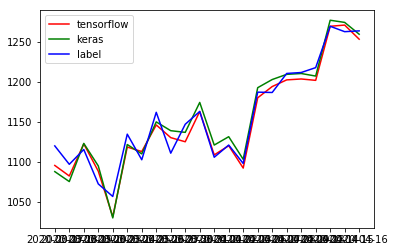

In [20]:
plt.figure()
plt.plot(tf_predicted,"r", label="tensorflow")
plt.plot(k_predicted,"g", label="keras")
plt.plot(test.Close,"b", label='label')
plt.legend()

In [24]:
print("tensorflow : ",np.mean(np.square(tf_predicted-test.Close.values)))
print("keras : ",np.mean(np.square(k_predicted-test.Close.values)))

tensorflow :  7735.770768259452
keras :  7975.670449032783


tensorflow가 값이 더 작음으로 값이 더 잘 나온다

# tree

In [61]:
data = pd.read_csv("C:/Users/student/Desktop/TIL/머신러닝&딥러닝/Datasest/trees.csv")
data.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [62]:
data.shape

(31, 3)

In [63]:
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])
data.head()

,Girth,Height,Volume
0,-1.602920,-0.957213,10.3
1,-1.505741,-1.754890,10.3
2,-1.440956,-2.073961,10.2
3,-0.890279,-0.638142,16.4
4,-0.825493,0.797677,18.8


In [64]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 2), (10, 2), (21,), (10,))

### tensorflow

In [65]:
model = Sequential()
model.add(Dense(units=64, input_dim=2,activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [66]:
es = EarlyStopping(patience=5)

seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)
hist = model.fit(X_train, y_train, epochs=500, batch_size=16, callbacks=[es])

Epoch 1/500
21/21 [==============================] - 0s 12ms/step - loss: 1031.1854 - mae: 27.4745
Epoch 2/500
21/21 [==============================] - 0s 381us/step - loss: 998.9138 - mae: 26.8846
Epoch 3/500
21/21 [==============================] - 0s 524us/step - loss: 964.0387 - mae: 26.2445
Epoch 4/500
21/21 [==============================] - 0s 333us/step - loss: 929.8237 - mae: 25.6215
Epoch 5/500
21/21 [==============================] - 0s 286us/step - loss: 896.0739 - mae: 24.9579
Epoch 6/500
21/21 [==============================] - 0s 238us/step - loss: 857.1448 - mae: 24.2409
Epoch 7/500
21/21 [==============================] - 0s 286us/step - loss: 823.0521 - mae: 23.5090
Epoch 8/500
21/21 [==============================] - 0s 429us/step - loss: 785.9491 - mae: 22.7476
Epoch 9/500
21/21 [==============================] - 0s 238us/step - loss: 747.8121 - mae: 21.9523
Epoch 10/500
21/21 [==============================] - 0s 286us/step - loss: 713.1997 - mae: 21.1170
Epoch 11/

C:\Users\student\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 0s 333us/step - loss: 380.6939 - mae: 12.6664
Epoch 20/500
21/21 [==============================] - 0s 286us/step - loss: 350.3037 - mae: 12.2176
Epoch 21/500
21/21 [==============================] - 0s 286us/step - loss: 317.7980 - mae: 11.6479
Epoch 22/500
21/21 [==============================] - 0s 190us/step - loss: 297.3668 - mae: 11.5352
Epoch 23/500
21/21 [==============================] - 0s 238us/step - loss: 272.4925 - mae: 11.2012
Epoch 24/500
21/21 [==============================] - ETA: 0s - loss: 323.6442 - mae: 12.87 - 0s 238us/step - loss: 256.0028 - mae: 11.2019
Epoch 25/500
21/21 [==============================] - 0s 190us/step - loss: 241.6971 - mae: 11.0861
Epoch 26/500
21/21 [==============================] - 0s 238us/step - loss: 233.8528 - mae: 11.2577
Epoch 27/500
21/21 [==============================] - ETA: 0s - loss: 278.4143 - mae: 12.75 - 0s 238us/step - loss: 227.1334 - mae: 11.3532
Epoch 28/500
21/21 [==============================] - 0s 333us/step - l

21/21 [==============================] - 0s 333us/step - loss: 205.5718 - mae: 11.1924
Epoch 100/500
21/21 [==============================] - 0s 238us/step - loss: 205.1704 - mae: 11.2088
Epoch 101/500
21/21 [==============================] - 0s 238us/step - loss: 204.8709 - mae: 11.2221
Epoch 102/500
21/21 [==============================] - 0s 239us/step - loss: 204.5213 - mae: 11.2121
Epoch 103/500
21/21 [==============================] - 0s 286us/step - loss: 204.2946 - mae: 11.1841
Epoch 104/500
21/21 [==============================] - 0s 238us/step - loss: 204.1340 - mae: 11.1405
Epoch 105/500
21/21 [==============================] - 0s 238us/step - loss: 204.0002 - mae: 11.0826
Epoch 106/500
21/21 [==============================] - 0s 239us/step - loss: 204.8749 - mae: 11.0318
Epoch 107/500
21/21 [==============================] - 0s 286us/step - loss: 204.8076 - mae: 10.9910
Epoch 108/500
21/21 [==============================] - 0s 190us/step - loss: 204.7809 - mae: 10.9759
Epoc

21/21 [==============================] - 0s 190us/step - loss: 181.0797 - mae: 10.3981
Epoch 181/500
21/21 [==============================] - 0s 238us/step - loss: 181.1071 - mae: 10.3621
Epoch 182/500
21/21 [==============================] - 0s 286us/step - loss: 181.5968 - mae: 10.3407
Epoch 183/500
21/21 [==============================] - 0s 238us/step - loss: 180.8932 - mae: 10.3504
Epoch 184/500
21/21 [==============================] - 0s 238us/step - loss: 179.0590 - mae: 10.4197
Epoch 185/500
21/21 [==============================] - 0s 285us/step - loss: 178.6180 - mae: 10.4805
Epoch 186/500
21/21 [==============================] - 0s 191us/step - loss: 177.4263 - mae: 10.4957
Epoch 187/500
21/21 [==============================] - 0s 285us/step - loss: 177.0633 - mae: 10.5233
Epoch 188/500
21/21 [==============================] - 0s 190us/step - loss: 176.3341 - mae: 10.5444
Epoch 189/500
21/21 [==============================] - 0s 286us/step - loss: 176.1323 - mae: 10.5637
Epoc

21/21 [==============================] - 0s 285us/step - loss: 134.9641 - mae: 9.5829
Epoch 261/500
21/21 [==============================] - 0s 333us/step - loss: 133.8197 - mae: 9.3950
Epoch 262/500
21/21 [==============================] - 0s 333us/step - loss: 133.3282 - mae: 9.1959
Epoch 263/500
21/21 [==============================] - 0s 238us/step - loss: 133.5208 - mae: 9.0529
Epoch 264/500
21/21 [==============================] - 0s 333us/step - loss: 133.3642 - mae: 8.9351
Epoch 265/500
21/21 [==============================] - 0s 286us/step - loss: 133.3199 - mae: 8.9080
Epoch 266/500
21/21 [==============================] - 0s 286us/step - loss: 131.6785 - mae: 8.8848
Epoch 267/500
21/21 [==============================] - 0s 286us/step - loss: 129.0868 - mae: 8.9544
Epoch 268/500
21/21 [==============================] - 0s 286us/step - loss: 129.4692 - mae: 9.1611
Epoch 269/500
21/21 [==============================] - 0s 238us/step - loss: 128.1704 - mae: 9.2876
Epoch 270/500


21/21 [==============================] - 0s 286us/step - loss: 53.6284 - mae: 5.6369
Epoch 343/500
21/21 [==============================] - 0s 238us/step - loss: 51.8051 - mae: 5.6201
Epoch 344/500
21/21 [==============================] - 0s 238us/step - loss: 51.7688 - mae: 5.6311
Epoch 345/500
21/21 [==============================] - 0s 190us/step - loss: 50.2694 - mae: 5.5582
Epoch 346/500
21/21 [==============================] - 0s 190us/step - loss: 50.5904 - mae: 5.6214
Epoch 347/500
21/21 [==============================] - 0s 238us/step - loss: 49.8768 - mae: 5.5570
Epoch 348/500
21/21 [==============================] - 0s 238us/step - loss: 48.3282 - mae: 5.4436
Epoch 349/500
21/21 [==============================] - 0s 286us/step - loss: 47.1093 - mae: 5.3532
Epoch 350/500
21/21 [==============================] - 0s 285us/step - loss: 46.7236 - mae: 5.2001
Epoch 351/500
21/21 [==============================] - ETA: 0s - loss: 25.2459 - mae: 3.89 - 0s 333us/step - loss: 52.0666 

21/21 [==============================] - 0s 286us/step - loss: 34.6072 - mae: 4.6436
Epoch 425/500
21/21 [==============================] - 0s 238us/step - loss: 33.1249 - mae: 4.5878
Epoch 426/500
21/21 [==============================] - 0s 238us/step - loss: 33.5328 - mae: 4.6176
Epoch 427/500
21/21 [==============================] - 0s 238us/step - loss: 32.9953 - mae: 4.5678
Epoch 428/500
21/21 [==============================] - 0s 238us/step - loss: 32.8060 - mae: 4.5233
Epoch 429/500
21/21 [==============================] - 0s 286us/step - loss: 32.2218 - mae: 4.4738
Epoch 430/500
21/21 [==============================] - 0s 238us/step - loss: 31.9364 - mae: 4.4463
Epoch 431/500
21/21 [==============================] - 0s 238us/step - loss: 31.9961 - mae: 4.4628
Epoch 432/500
21/21 [==============================] - 0s 238us/step - loss: 33.5873 - mae: 4.5680
Epoch 433/500
21/21 [==============================] - 0s 285us/step - loss: 34.8047 - mae: 4.6455
Epoch 434/500
21/21 [===

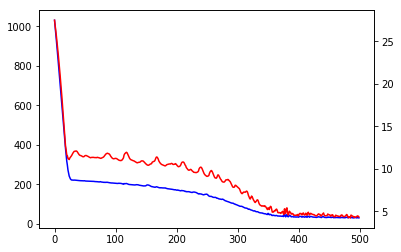

In [67]:
fig, loss_ax = plt.subplots()
mae_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'b',label='train loss')
mae_ax.plot(hist.history['mae'],'r',label='train mae')

In [68]:
loss,mae = model.evaluate(X_test,y_test)
print("loss: ",loss)
print("mae: ",mae)

10/10 [==============================] - 0s 9ms/step
loss:  23.83310317993164
mae:  3.671576976776123


In [77]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 197us/step


[23.83310317993164, 3.671576976776123]

In [112]:
k_predicted = model.predict(X_test)

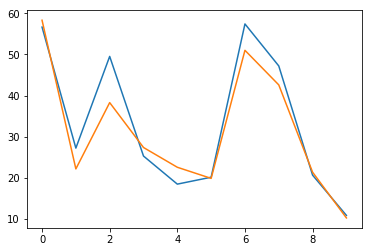

In [113]:
plt.plot(k_predicted)
plt.plot(y_test)

### tensorflow

In [101]:
w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

hf = tf.matmul(x,w) + b
cost = tf.reduce_mean(tf.square(hf-y))

train = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

In [92]:
# y_train = y_train.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

In [105]:
seed = 123
np.random.seed(seed)
tf.set_random_seed(seed)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1,2001):
        cv,_ = sess.run([cost,train], feed_dict={x:X_train,y:y_train})
        if step%200==0:
            print(step,"번째 ",cv)
    
    hv, wv, bv = sess.run([hf,w,b],feed_dict = {x:X_test,y:y_test})
    print("Evaluate : {}".format(np.average((hv - y_test)**2)))

200 번째  145.71843
400 번째  104.52948
600 번째  79.843765
800 번째  65.04576
1000 번째  56.171864
1200 번째  50.847355
1400 번째  47.649437
1600 번째  45.725616
1800 번째  44.565205
2000 번째  43.86212
Evaluate : 19.72606034553344


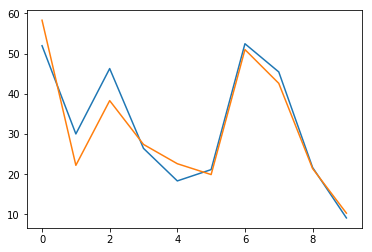

In [117]:
plt.plot(hv)
plt.plot(y_test)

### 비교

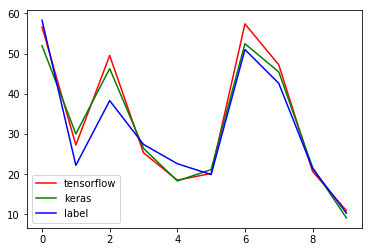

In [122]:
plt.figure()
plt.plot(k_predicted,"r", label="tensorflow")
plt.plot(hv,"g", label="keras")
plt.plot(y_test,"b", label='label')
plt.legend()

In [124]:
print("tensorflow : ",np.mean(np.square(hv-y_test)))
print("keras : ",np.mean(np.square(k_predicted-y_test)))

tensorflow :  19.72606034553344
keras :  23.833100560620405


tensorflow가 값이 더 작음으로 값이 더 잘 나온다